## Google User Concerns Regarding Covid & Babies

Chaya Bakshi, Chloe Chu, Dharaa Upadhyaya, Leena Usman, Sylvia Guendelman, PhD, MSW

### Introduction

In this notebook, you will have a chance to follow along the steps taken in order to carry out to explore the following questions:
-  What concerns do Google users living in the U.S. have with
regards to `covid babies` from February 10, 2020 – February 10, 2021?
- What concerns do Google users living in the TX have with
regards to `covid babies` from February 10, 2020 – February 10, 2021?
- What sources are users in the U.S. utilizing the most in regards to the initial search term, `covid babies`?


### Setup

Let's begin by importing the following libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from graphviz import Digraph
from graphviz import Source

from IPython import display

### Getting to Know Your Data

We obtained our data by using three Google APIs: 
1. Google Trends
2. Google Health
3. Google Custom Search

The Google Trends API provided us with the top search queries given an initial search term for a specified time period and location. Along with the initial search term, it also returns the corresponding Relative Search Index (RSI), which is the search interest relative to all searches during a specific period of time. 

The Google Health Trends API generates the Relative Search Volume (RSV) for a list of top queries in a specific region and time period. Because each run of the API is a random sample, the simulation was run 30 times for the same search term, and the mean was taken across all RSVs in order to determine the final RSV for the master list.

Tbe Google Custom Search API provides us with the list of top websites that people are shown when browsing Google with the initial
search term in the U.S. only.

Let's take a look at the dataset produced after 30 iterations of the Google Heath Trends API using the inital search term `covid babies`, time range `02-10-2020 - 02-10-2021` and the region `US`.

In [10]:
us = pd.read_csv('datatable1.csv').drop(columns = 'Unnamed: 0')
us

,Related Query,Relative Search Volume,Country
0,covid 19 symptoms,0.223314,US
1,covid vaccine,0.158093,US
2,covid symptoms in babies,0.139843,US
3,covid and babies,0.000415,US
4,covid in babies,0.000348,US
5,babies with covid,0.000318,US
6,can babies get covid,0.000205,US
7,do babies get covid,0.000099,US
8,covid rash in babies,0.000069,US
9,covid test for babies,0.000050,US


Combine like terms and add the values of their relative search volumes.

In [9]:
val1 = us.loc[0 ,'Relative Search Volume']
val2 = us.loc[1 ,'Relative Search Volume']
val3 = us.loc[2 ,'Relative Search Volume']
val4 = us.loc[3 ,'Relative Search Volume'] + us.loc[3 ,'Relative Search Volume'] + us.loc[5 ,'Relative Search Volume']
val5 = us.loc[6 ,'Relative Search Volume'] + us.loc[7 ,'Relative Search Volume']
val6 = us.loc[8 ,'Relative Search Volume']
val7 = us.loc[9 ,'Relative Search Volume']

data = [['covid symptoms', val1],
['covid vaccine', val2],
['covid symptoms in babies', val3],
['covid in babies', val4],
['can babies get covid', val5],
['covid rash in babies', val6],
['covid test for babies', val7]]

df = pd.DataFrame(data, columns = ['Related Query', 'Relative Search Volume'])
df = df.sort_values('Relative Search Volume', ascending = False)
df['Region'] = 'US'
us = df

us

,Related Query,Relative Search Volume,Region
0,covid symptoms,0.223314,US
1,covid vaccine,0.158093,US
2,covid symptoms in babies,0.139843,US
3,covid in babies,0.001148,US
4,can babies get covid,0.000304,US
5,covid rash in babies,0.000069,US
6,covid test for babies,0.000050,US


Using this datatable, we are able to recognize the first-level queries and the corresponding values of their relative search volumes in the US. 

Here, we have crafted our master list.

### Creating Graph Visualizations

Taking each term in our master list as the inital search term, the follow-up terms were pulled from the API and the following graph visualization is created in order to demonstrate user search interest with their associated relative search indicies.

Here is an outline of code on how to create a graph visualization:

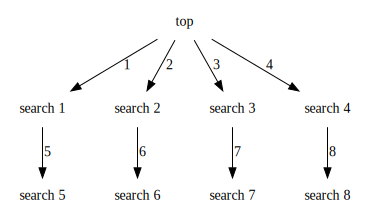

In [18]:
temp = """
digraph G{
edge [dir=forward]
node [shape=plaintext]

0 [label= "top"]
0 -> 1 [label=1]
0 -> 2 [label=2]
0 -> 3 [label=3]
0 -> 4 [label=4]


1 -> 5 [label=5]
2 -> 6 [label=6]
3 -> 7 [label=7]
4 -> 8 [label=8]


1 [label = "search 1"]
2 [label = "search 2"]
3 [label = "search 3"]
4 [label = "search 4"]

5 [label = "search 5"]
6 [label = "search 6"]
7 [label = "search 7"]
8 [label = "search 8"]


}
"""
s = Source(temp)
s

#### US Graph Visualization

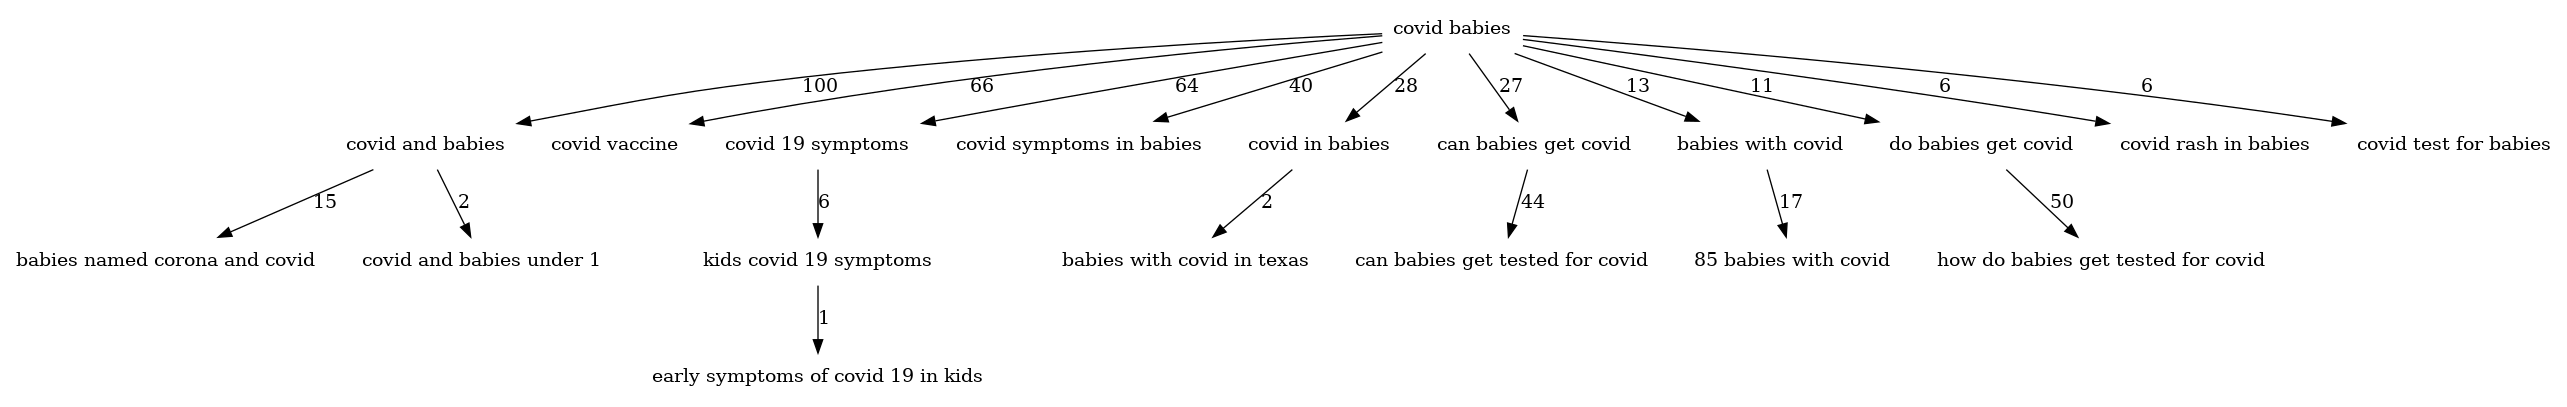

In [2]:
display.Image("US_final.png")

From the graph visualization above, we may categorize U.S. users concerns into the following topics: 
1. General covid symptoms for everyone
2. General covid symptoms for babies
3. Specific covid symptoms for babies
    - “covid rash in babies”
4. Covid vaccine
5. Covid in babies
6. Can/do babies get covid
7. Covid tests for babies

 Due to one of the U.S. follow-up terms being concerned with babies
in Texas, we decided to continue our research by exploring Texas user search concerns. The same procedure was followed, and the following graph visualization was produced:

#### TX Graph Visualization

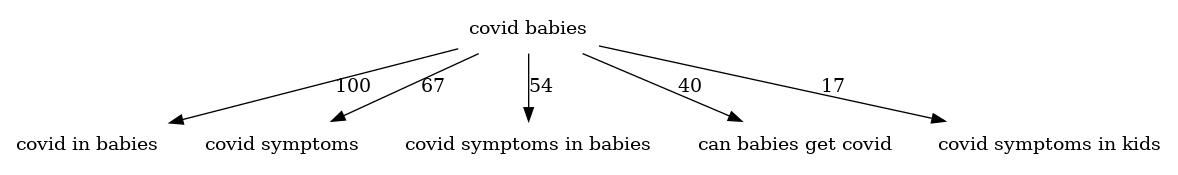

In [3]:
display.Image("this (2).png")

Texas concerns may be categorized into the following topics: 
1. General covid symptoms for everyone
2. General covid symptoms in kids
3. General covid symptoms for babies
4. Can babies get covid

### Comparing RSVs

In order to compare the RSVs of similar terms in the master lists of the US and Texas, we created a bar plot.

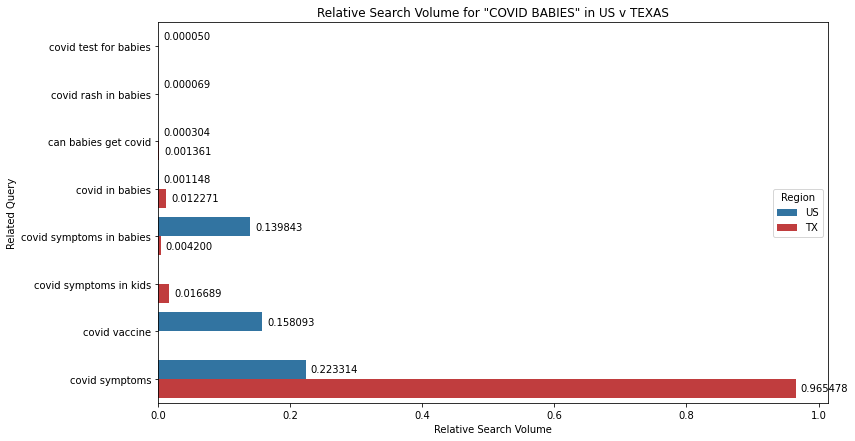

In [4]:
display.Image("rsvs.png")

### Using Custom Search API to Pull US Top Websites

This data presents what sources users in the US are directed towards when searching for “covid babies” in
the selected time period. 

Included in the table is the site rank on a scale of 1 to 10 —1 being most visited and 10 being least visited— web page URL, site probabilities, and a summary of the information presented within each webpage. 

The summary column organizes the information presented in each webpage into either being general or specific, as consistent with the categorization of topics in the graph visualization, where general information was sought out most often. 

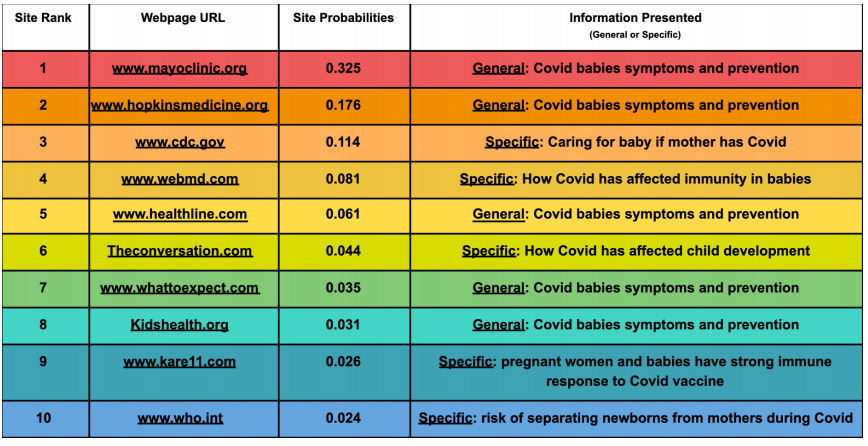

In [5]:
display.Image("w.png")

### Conclusion

In this notebook, we learned how to utilize Google Trends, Google Health Trends, and the Custom Search API in order to address our research objective. We learned about how and where data is pulled from and how to assemble it into neat, readable visualizations, including graph visualizations to depict relative search interest, bar plots to compare RSV values, and a data table to display top webistes.

## THE END!